In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Acceder a archivos en Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#Leemos los datos de las estaruras de las personas según sus pesos
df = pd.read_csv('/content/drive/MyDrive/Data/weight-height.csv')
df

FileNotFoundError: ignored

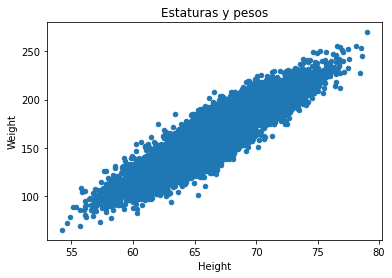

In [ ]:
#Graficamos
df.plot(
  kind='scatter',
  x='Height',
  y='Weight',
  title='Estaturas y pesos'
)

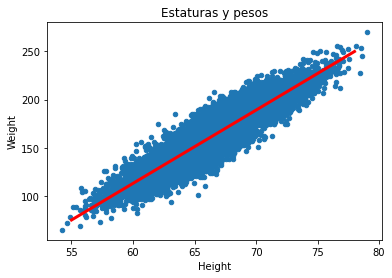

In [ ]:
#Dibujamos una recta manualmente en el gráfico anterior

#El gráfico
df.plot(
  kind='scatter',
  x='Height',
  y='Weight',
  title='Estaturas y pesos'
)

#La recta
#Esta sería una recta que representa bien la realidad
#Pero, ¿qué tan bien la representa?, vamos a calcular el error de la recta
plt.plot(
  [55, 78], #Dos puntos en el eje X
  [75, 250], #Dos puntos en el eje Y
  color='red', #Color rojo
  linewidth=3 #Ancho de línea
)

In [ ]:
#Ya sabemos que la recta tiene la forma:
# Y = b + wX

#Crearemos una función que representa a una recta
def recta(x, w, b):
  y = b + w*x
  return y

In [ ]:
#Vamos a probar la función asignando algunos valores de prueba a x, w y b
x = 1
w = 7
b = 3
y = recta(x, w, b)
y

10

In [ ]:
#O podemos probar directament la función
y = recta(9, 11, -2)
y

97

In [ ]:
#Ahora, vamos a generar una serie de puntos para X
#Recordemos que "linspace" genere cierta cantidad de puntos (100) entre un rango numérico que le indiquemos (55 y 80) de manera equidistante
x = np.linspace(55, 80, 100)
x

array([55.        , 55.25252525, 55.50505051, 55.75757576, 56.01010101,
       56.26262626, 56.51515152, 56.76767677, 57.02020202, 57.27272727,
       57.52525253, 57.77777778, 58.03030303, 58.28282828, 58.53535354,
       58.78787879, 59.04040404, 59.29292929, 59.54545455, 59.7979798 ,
       60.05050505, 60.3030303 , 60.55555556, 60.80808081, 61.06060606,
       61.31313131, 61.56565657, 61.81818182, 62.07070707, 62.32323232,
       62.57575758, 62.82828283, 63.08080808, 63.33333333, 63.58585859,
       63.83838384, 64.09090909, 64.34343434, 64.5959596 , 64.84848485,
       65.1010101 , 65.35353535, 65.60606061, 65.85858586, 66.11111111,
       66.36363636, 66.61616162, 66.86868687, 67.12121212, 67.37373737,
       67.62626263, 67.87878788, 68.13131313, 68.38383838, 68.63636364,
       68.88888889, 69.14141414, 69.39393939, 69.64646465, 69.8989899 ,
       70.15151515, 70.4040404 , 70.65656566, 70.90909091, 71.16161616,
       71.41414141, 71.66666667, 71.91919192, 72.17171717, 72.42

In [ ]:
#Con estos 100 puntos X vamos a evaluar nuestra función de la recta
#A esta recta le daremos un valor de w=0 y b=0, es decir estará sobre el eje X
y_hipotesis = recta(x, 0, 0)
y_hipotesis

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

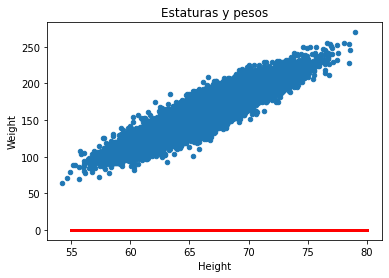

In [ ]:
#Vamos a dibujar la recta obtenida con los valores de "x" y "y_hipotesis" sobre nuestro gráfico real

#Gráfico de casos reales
df.plot(
  kind='scatter',
  x='Height',
  y='Weight',
  title='Estaturas y pesos'
)

#Recta hipótesis
#Obviamente esta recta no representa bien el patrón de la realidad
#¿Qué tan mal está representando el patrón de la realidad esta recta?
#Para averiguarlo hay que calcular la función de costo de error cuadrático
plt.plot(x, y_hipotesis, color='red', linewidth=3)

In [ ]:
#Definamos la función de costo
#Recibirá el valor Y real y el valor Y hipótesis predicho por la recta
def mean_squared_error(y_real, y_hipotesis):
  #Restamos cada punto del array y lo elevamos al cuadrado
  error = (y_real - y_hipotesis)**2

  #Luego sumamos cada resultado y lo dividimos entre el número de puntos del array
  error_promedio = error.mean()

  #Retornamos la respuesta
  return error_promedio

In [ ]:
#Verifiquemos el error cuadrado

#Definamos quién es X (Height)
x = df['Height'].values
x

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [ ]:
#Definamos el y_real, o sea el que está en nuestro dataframe, los pesos verdaderos (Weight)
y_real = df['Weight'].values
y_real

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

# Probemos una primera hipótesis

w = 0
b = 0

In [ ]:
#Ahora definamos los y_hipostesis que son los que la recta nos entrega

#Vamos a probar con un w=0 y b=0
y_hipotesis = recta(x, 0, 0)
y_hipotesis

array([0., 0., 0., ..., 0., 0., 0.])

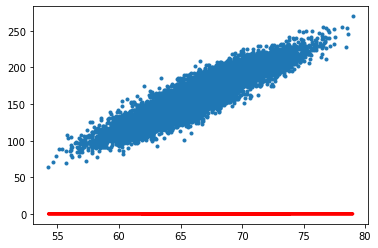

In [ ]:
#Dibujamos el gráfico y la recta hipótesis
plt.plot(x, y_real, '.')

#Recta hipótesis
plt.plot(x, y_hipotesis, color='red', linewidth=3)

In [ ]:
#Y veamos ahora el error de nuestra hipótesis
#Veremos que obtenemos un error grande
error = mean_squared_error(y_real, y_hipotesis)
error

27093.83757456157

# Probemos otras hipótesis


4551.709996422391

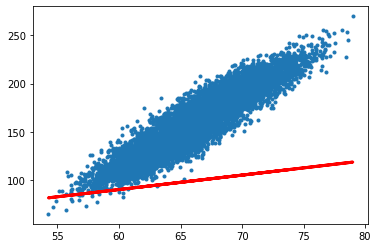

In [ ]:
#Vamos a probar una segunda hipótesis
w_1 = 1.5
b_1 = 0
y_hipotesis_1 = recta(x, w_1, b_1)
y_hipotesis_1

#Y graficamos
#Dibujamos el gráfico y la recta hipótesis
plt.plot(x, y_real, '.')

#Recta hipótesis
plt.plot(x, y_hipotesis_1, color='red', linewidth=3)

#Error de la hipótesis
error_1 = mean_squared_error(y_real, y_hipotesis_1)
error_1

1899.2617604632856

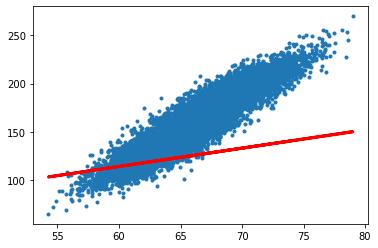

In [ ]:
#Vamos a probar una tercera hipótesis
w_2 = 1.9
b_2 = 0
y_hipotesis_2 = recta(x, w_2, b_2)
y_hipotesis_2

#Y graficamos
#Dibujamos el gráfico y la recta hipótesis
plt.plot(x, y_real, '.')

#Recta hipótesis
plt.plot(x, y_hipotesis_2, color='red', linewidth=3)

#Error de la hipótesis
error_2 = mean_squared_error(y_real, y_hipotesis_2)
error_2

661.0391181370262

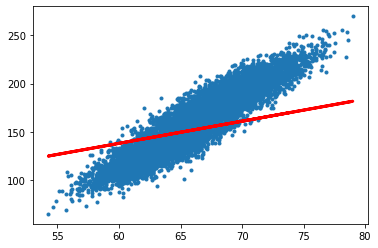

In [ ]:
#Probemos otra hipótesis más
w_3 = 2.3
b_3 = 0
y_hipotesis_3 = recta(x, w_3, b_3)
y_hipotesis_3

#Y graficamos
#Dibujamos el gráfico y la recta hipótesis
plt.plot(x, y_real, '.')

#Recta hipótesis
plt.plot(x, y_hipotesis_3, color='red', linewidth=3)

#Error de la hipótesis
error_3 = mean_squared_error(y_real, y_hipotesis_3)
error_3

837.0420694436136

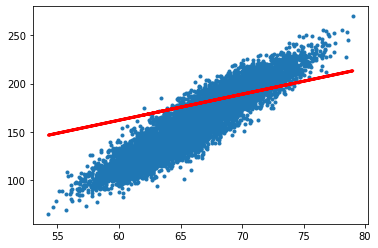

In [ ]:
#Una más
w_4 = 2.7
b_4 = 0
y_hipotesis_4 = recta(x, w_4, b_4)
y_hipotesis_4

#Y graficamos
#Dibujamos el gráfico y la recta hipótesis
plt.plot(x, y_real, '.')

#Recta hipótesis
plt.plot(x, y_hipotesis_4, color='red', linewidth=3)

#Error de la hipótesis
error_4 = mean_squared_error(y_real, y_hipotesis_4)
error_4

2427.270614383048

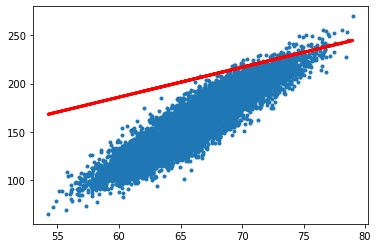

In [ ]:
#Una última hipótesis
w_5 = 3.1
b_5 = 0
y_hipotesis_5 = recta(x, w_5, b_5)
y_hipotesis_5

#Y graficamos
#Dibujamos el gráfico y la recta hipótesis
plt.plot(x, y_real, '.')

#Recta hipótesis
plt.plot(x, y_hipotesis_5, color='red', linewidth=3)

#Error de la hipótesis
error_5 = mean_squared_error(y_real, y_hipotesis_5)
error_5

# Dibujemos la evolución de los errores de las hipótesis

In [ ]:
#Como mantuvimos "b=0" en todos los casos, lo omitiremos para graficar

#Valores "w" que hemos probado para nuestras hipótesis
valores_w = [w_1, w_2, w_3, w_4, w_5]
valores_w

[1.5, 1.9, 2.3, 2.7, 3.1]

In [ ]:
#Errores de cada hipótesis
errores_hipotesis = [error_1, error_2, error_3, error_4, error_5]
errores_hipotesis

[4551.709996422391,
 1899.2617604632856,
 661.0391181370262,
 837.0420694436136,
 2427.270614383048]

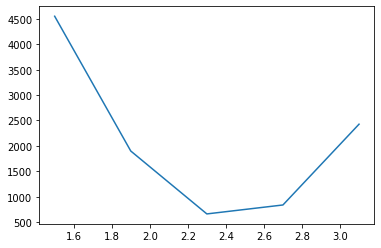

In [ ]:
#Graficamos los valores_w de las hipótesis vs el error obtenido
#Podemos notar que el error disminuye con cierta "calibración" (selección de valores de nuestros parámetros, para este ejemplo, el valor de "w") y luego comienzan a aumentar nuevamente
plt.plot(valores_w, errores_hipotesis)

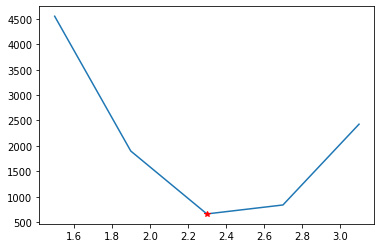

In [ ]:
#Lo que estamos viendo es una función cuadrática, por eso a esta función de error se le conoce como función de error cuadrático, al ser una función cuadrática se garantiza un mínimo global
#¿Qué es el mínimo global?, es el punto en donde la función toma su valor más bajo
#Para el ejemplo, sería el punto w_3 (2.3)

#Graficamos la función del error cuadrático con nuestras diferentes calibraciones
plt.plot(valores_w, errores_hipotesis)

#Graficamos el punto con el menor error
plt.plot(w_3, error_3, 'r*')

In [ ]:
#¿Cómo podríamos implementar un algoritmo de Machine Learning que descubra este mínimo global?
#Deberíamos probar diferentes calibraciones de "w" y "b", ir auméntandolas y ver qué es lo que pasa con el error
#Si el error va aumentando, debemos ir hacia el lado opuesto en nuestra calibración (disminuir los valores de "w" y "b")
#Si el error va disminuyendo, debemos seguir aumentando nuestra calibración (aumentar los valores de "w" y "b")
#Estos pasos los deberemos de ir iterando muchas veces hasta encontrar el punto mínimo global

# Implementación manual variando el "w"

In [ ]:
#Podriamos hacer una implementación manual

#Valores "b"
array_b = np.zeros(100)
array_b

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
#Valores "w"
array_w = np.linspace(1, 3.5, 100)
array_w

array([1.        , 1.02525253, 1.05050505, 1.07575758, 1.1010101 ,
       1.12626263, 1.15151515, 1.17676768, 1.2020202 , 1.22727273,
       1.25252525, 1.27777778, 1.3030303 , 1.32828283, 1.35353535,
       1.37878788, 1.4040404 , 1.42929293, 1.45454545, 1.47979798,
       1.50505051, 1.53030303, 1.55555556, 1.58080808, 1.60606061,
       1.63131313, 1.65656566, 1.68181818, 1.70707071, 1.73232323,
       1.75757576, 1.78282828, 1.80808081, 1.83333333, 1.85858586,
       1.88383838, 1.90909091, 1.93434343, 1.95959596, 1.98484848,
       2.01010101, 2.03535354, 2.06060606, 2.08585859, 2.11111111,
       2.13636364, 2.16161616, 2.18686869, 2.21212121, 2.23737374,
       2.26262626, 2.28787879, 2.31313131, 2.33838384, 2.36363636,
       2.38888889, 2.41414141, 2.43939394, 2.46464646, 2.48989899,
       2.51515152, 2.54040404, 2.56565657, 2.59090909, 2.61616162,
       2.64141414, 2.66666667, 2.69191919, 2.71717172, 2.74242424,
       2.76767677, 2.79292929, 2.81818182, 2.84343434, 2.86868

In [ ]:
#Definimos una array de errores de 100 elementos
#Le colocamos ceros inicialmente
array_errores = np.zeros(100)

#Empezamos a iterar
for i in range(0, 100):
  #Obtenemos la hipótesis
  y_hipotesis = recta(x, array_w[i], array_b[i])

  #Obtenemos el error de la hipótesis
  array_errores[i] = mean_squared_error(y_real, y_hipotesis)
  array_errores[i]

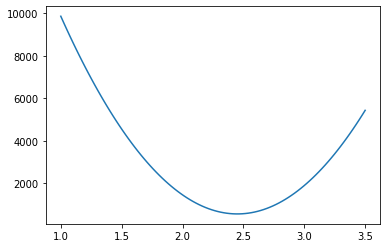

In [ ]:
#Graficamos la función de costo
plt.plot(array_w, array_errores)

#Notamos que hay un mínimo global, averiguamos el valor de "w" para ese mínimo global

In [ ]:
#Obtenemos el valor mínimo
error_minimo = array_errores.min()
error_minimo

561.8283568955101

In [ ]:
#Obtenemos el índice de ese error dentro del array
indice_minimo = array_errores.argmin()
indice_minimo

57

In [ ]:
#Veamos cuál era ese "w"
w_error_minimo = array_w[indice_minimo]
w_error_minimo

2.4393939393939394

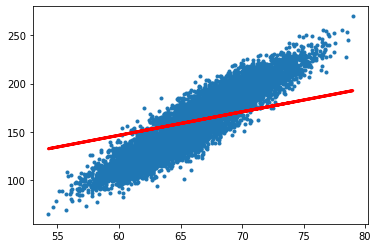

In [ ]:
#Graficamos 
w = w_error_minimo
b = 0
y_hipotesis = recta(x, w, b)
y_hipotesis

#Y graficamos
#Dibujamos el gráfico y la recta hipótesis
plt.plot(x, y_real, '.')

#Recta hipótesis
plt.plot(x, y_hipotesis, color='red', linewidth=3)

# Implementación manual variando el "w" y el "b"

In [ ]:
#Valores "b"
array_b = np.linspace(-15, 15, 100)
array_b

array([-15.        , -14.6969697 , -14.39393939, -14.09090909,
       -13.78787879, -13.48484848, -13.18181818, -12.87878788,
       -12.57575758, -12.27272727, -11.96969697, -11.66666667,
       -11.36363636, -11.06060606, -10.75757576, -10.45454545,
       -10.15151515,  -9.84848485,  -9.54545455,  -9.24242424,
        -8.93939394,  -8.63636364,  -8.33333333,  -8.03030303,
        -7.72727273,  -7.42424242,  -7.12121212,  -6.81818182,
        -6.51515152,  -6.21212121,  -5.90909091,  -5.60606061,
        -5.3030303 ,  -5.        ,  -4.6969697 ,  -4.39393939,
        -4.09090909,  -3.78787879,  -3.48484848,  -3.18181818,
        -2.87878788,  -2.57575758,  -2.27272727,  -1.96969697,
        -1.66666667,  -1.36363636,  -1.06060606,  -0.75757576,
        -0.45454545,  -0.15151515,   0.15151515,   0.45454545,
         0.75757576,   1.06060606,   1.36363636,   1.66666667,
         1.96969697,   2.27272727,   2.57575758,   2.87878788,
         3.18181818,   3.48484848,   3.78787879,   4.09

In [ ]:
#Valores "w"
array_w = np.linspace(1, 3.5, 100)
array_w

array([1.        , 1.02525253, 1.05050505, 1.07575758, 1.1010101 ,
       1.12626263, 1.15151515, 1.17676768, 1.2020202 , 1.22727273,
       1.25252525, 1.27777778, 1.3030303 , 1.32828283, 1.35353535,
       1.37878788, 1.4040404 , 1.42929293, 1.45454545, 1.47979798,
       1.50505051, 1.53030303, 1.55555556, 1.58080808, 1.60606061,
       1.63131313, 1.65656566, 1.68181818, 1.70707071, 1.73232323,
       1.75757576, 1.78282828, 1.80808081, 1.83333333, 1.85858586,
       1.88383838, 1.90909091, 1.93434343, 1.95959596, 1.98484848,
       2.01010101, 2.03535354, 2.06060606, 2.08585859, 2.11111111,
       2.13636364, 2.16161616, 2.18686869, 2.21212121, 2.23737374,
       2.26262626, 2.28787879, 2.31313131, 2.33838384, 2.36363636,
       2.38888889, 2.41414141, 2.43939394, 2.46464646, 2.48989899,
       2.51515152, 2.54040404, 2.56565657, 2.59090909, 2.61616162,
       2.64141414, 2.66666667, 2.69191919, 2.71717172, 2.74242424,
       2.76767677, 2.79292929, 2.81818182, 2.84343434, 2.86868

In [ ]:
#EN ESTE MOMENTO NO IMPORTANTE ENTENDER ESTE CÓDIGO, LOS FRAMEWORKS YA LO TIENEN IMPLEMENTANDO
#LO IMPORTANTE ES ENTENDER QUE EL CÁLCULO PARA ENCONTRAR LA RECTA SE ESTÁ HACIENDO COSTOSO (100 MIL CALIBRACIONES DIFERENTES)

#Definimos una array de errores de 100 mil elementos, ya que vamos a probar diferentes calibraciones variando "w" y "b"
#Le colocamos ceros inicialmente
array_errores = np.zeros(100000)

#Creamos unas variables utilitarias
array_grafico_w = np.zeros(100000)
array_grafico_b = np.zeros(100000)

#Definimos el error minimo
error_minimo = 1000000000
i_minimo = -1
j_minimo = -1

#Empezamos a iterar
#La primera iteración es para probar los 100 "w",
#En la segunda, para cada "w" probamos los 100 "b"
for i in range(0, 100):
  for j in range(0, 100):
    array_grafico_w[i*100 + j] = array_w[i]
    array_grafico_b[i*100 + j] = array_b[j]

    #Obtenemos la hipótesis
    y_hipotesis = recta(x, array_w[i], array_b[j])

    #Obtenemos el error de la hipótesis
    array_errores[i*100 + j] = mean_squared_error(y_real, y_hipotesis)

    #Actualizamos el error mínimo
    if error_minimo > array_errores[i*100 + j]:
      error_minimo = array_errores[i*100 + j]
      i_minimo = i
      j_minimo = j

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


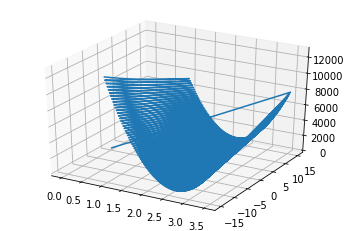

In [ ]:
#Graficamos la función de costo
# Creamos la figura
fig = plt.figure()

# Agrrgamos un plano 3D
ax1 = fig.add_subplot(111,projection='3d')

# Datos en array bi-dimensional
eje_x = np.array([array_grafico_w])
eje_y = np.array([array_grafico_b])
eje_z = np.array([array_errores])

# plot_wireframe nos permite agregar los datos x, y, z. Por ello 3D
# Es necesario que los datos esten contenidos en un array bi-dimensional
ax1.plot_wireframe(eje_x, eje_y, eje_z)

# Mostramos el gráfico
plt.show()

In [ ]:
#Obtenemos el valor mínimo
error_minimo = array_errores.min()
error_minimo

0.0

In [ ]:
array_errores

array([12933.20894476, 12866.58998601, 12800.154682  , ...,
           0.        ,     0.        ,     0.        ])

In [ ]:
#Veamos cuál era ese "w"
w_error_minimo = array_w[i_minimo]
w_error_minimo

2.666666666666667

In [ ]:
#Veamos cuál era ese "b"
b_error_minimo = array_b[j_minimo]
b_error_minimo

-15.0

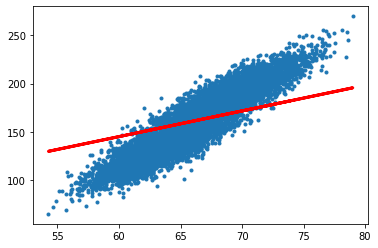

In [ ]:
#Graficamos 
w = w_error_minimo
b = b_error_minimo
y_hipotesis = recta(x, w, b)
y_hipotesis

#Y graficamos
#Dibujamos el gráfico y la recta hipótesis
plt.plot(x, y_real, '.')

#Recta hipótesis
plt.plot(x, y_hipotesis, color='red', linewidth=3)